## Simulation with Bayesian Information Criterion:

### Estimating the number of componenets of NMF:
 
<img src="exp_4comp.PNG" alt="NMF on documents" style="width: 80%"/>



In [1]:
import numpy as np
from scipy.sparse import csr_matrix
from scipy.sparse import isspmatrix
import matplotlib.pyplot as plt
import networkx as nx
from sklearn.decomposition import NMF

In [2]:
# ==============================
# Simulation

# Assumptions
n=30
k=4# Number of components (to be estimated)
M= 900 # Total number of data
np.random.seed(12345)

In [3]:
# Parameters to be estimated
# A_norm: n by k
# B_norm: k by n
# r_prob: k probabilities with sum 1

In [4]:
A_norm = np.zeros((n,k))
A_norm[0,0] = 1.0
A_norm[1,1] = 0.4
A_norm[2,1] = 0.4
A_norm[3,1] = 0.2
A_norm[4,2] = 1.0
A_norm[5,3] = 0.3
A_norm[6,3] = 0.6
A_norm[7,3] = 0.1
A_norm

array([[1. , 0. , 0. , 0. ],
       [0. , 0.4, 0. , 0. ],
       [0. , 0.4, 0. , 0. ],
       [0. , 0.2, 0. , 0. ],
       [0. , 0. , 1. , 0. ],
       [0. , 0. , 0. , 0.3],
       [0. , 0. , 0. , 0.6],
       [0. , 0. , 0. , 0.1],
       [0. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0. ]])

In [5]:
B_norm = np.zeros((k,n))
B_norm[0,1] = 0.1
B_norm[0,2] = 0.3
B_norm[0,3] = 0.6
B_norm[1,4] = 1.0
B_norm[2,5] = 0.2
B_norm[2,6] = 0.3
B_norm[2,7] = 0.5
B_norm[3,8] = 1.0
B_norm

array([[0. , 0.1, 0.3, 0.6, 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
        0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
        0. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0. , 1. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
        0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
        0. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0. , 0. , 0.2, 0.3, 0.5, 0. , 0. , 0. , 0. , 0. ,
        0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
        0. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 1. , 0. , 0. , 0. , 0. ,
        0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
        0. , 0. , 0. , 0. ]])

In [6]:
r_prob = np.array([0.5,0.2,0.2,0.1])
r_prob

array([0.5, 0.2, 0.2, 0.1])

In [7]:
np.sqrt(M * r_prob)

array([21.21320344, 13.41640786, 13.41640786,  9.48683298])

In [8]:
np.diag(np.sqrt(M * r_prob))

array([[21.21320344,  0.        ,  0.        ,  0.        ],
       [ 0.        , 13.41640786,  0.        ,  0.        ],
       [ 0.        ,  0.        , 13.41640786,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  9.48683298]])

In [9]:
# Construct unnormalized A, B
A = np.dot(A_norm, np.diag(np.sqrt(M * r_prob)))
B = np.dot(np.diag(np.sqrt(M * r_prob)), B_norm)
print(A)
print(B)

[[21.21320344  0.          0.          0.        ]
 [ 0.          5.36656315  0.          0.        ]
 [ 0.          5.36656315  0.          0.        ]
 [ 0.          2.68328157  0.          0.        ]
 [ 0.          0.         13.41640786  0.        ]
 [ 0.          0.          0.          2.84604989]
 [ 0.          0.          0.          5.69209979]
 [ 0.          0.          0.          0.9486833 ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.  

In [10]:
# Construct the matrix of average frequencies
# N.B. A, B are dense, but X should be sparse.

tmp = [(i,j,np.dot(A[i,:],B[:,j])) for i in np.nonzero(A)[0] for j in np.nonzero(B)[1]]
row_idx = [x[0] for x in tmp if x != 0.0]
col_idx = [x[1] for x in tmp if x != 0.0]
dat = [x[2] for x in tmp if x != 0.0]
print(tmp)

[(0, 1, 45.00000000000001), (0, 2, 135.0), (0, 3, 270.0), (0, 4, 0.0), (0, 5, 0.0), (0, 6, 0.0), (0, 7, 0.0), (0, 8, 0.0), (1, 1, 0.0), (1, 2, 0.0), (1, 3, 0.0), (1, 4, 72.00000000000001), (1, 5, 0.0), (1, 6, 0.0), (1, 7, 0.0), (1, 8, 0.0), (2, 1, 0.0), (2, 2, 0.0), (2, 3, 0.0), (2, 4, 72.00000000000001), (2, 5, 0.0), (2, 6, 0.0), (2, 7, 0.0), (2, 8, 0.0), (3, 1, 0.0), (3, 2, 0.0), (3, 3, 0.0), (3, 4, 36.00000000000001), (3, 5, 0.0), (3, 6, 0.0), (3, 7, 0.0), (3, 8, 0.0), (4, 1, 0.0), (4, 2, 0.0), (4, 3, 0.0), (4, 4, 0.0), (4, 5, 36.00000000000001), (4, 6, 54.0), (4, 7, 90.00000000000001), (4, 8, 0.0), (5, 1, 0.0), (5, 2, 0.0), (5, 3, 0.0), (5, 4, 0.0), (5, 5, 0.0), (5, 6, 0.0), (5, 7, 0.0), (5, 8, 27.0), (6, 1, 0.0), (6, 2, 0.0), (6, 3, 0.0), (6, 4, 0.0), (6, 5, 0.0), (6, 6, 0.0), (6, 7, 0.0), (6, 8, 54.0), (7, 1, 0.0), (7, 2, 0.0), (7, 3, 0.0), (7, 4, 0.0), (7, 5, 0.0), (7, 6, 0.0), (7, 7, 0.0), (7, 8, 9.0)]


In [11]:
X_avg = csr_matrix((dat, (row_idx, col_idx)), shape=(n,n))
X_avg.toarray()
#print(isspmatrix(X_avg))

# For debug, compare them:
print(X_avg.toarray())


[[  0.  45. 135. 270.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.]
 [  0.   0.   0.   0.  72.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.]
 [  0.   0.   0.   0.  72.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.]
 [  0.   0.   0.   0.  36.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.]
 [  0.   0.   0.   0.   0.  36.  54.  90.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.  27.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.  54.   0.   0.  

In [12]:
print(np.dot(A,B))

[[  0.  45. 135. 270.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.]
 [  0.   0.   0.   0.  72.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.]
 [  0.   0.   0.   0.  72.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.]
 [  0.   0.   0.   0.  36.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.]
 [  0.   0.   0.   0.   0.  36.  54.  90.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.  27.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.  54.   0.   0.  

In [13]:
noise = 1.0
X_avg = np.dot(A,B) + noise
X = np.zeros((n,n))
for i in range(n):
  for j in range(n):
    X[i,j] = np.random.poisson(X_avg[i,j],1)
X

array([[  1.,  39., 138., 284.,   2.,   0.,   0.,   4.,   2.,   0.,   1.,
          3.,   0.,   2.,   1.,   1.,   3.,   1.,   0.,   0.,   1.,   1.,
          1.,   3.,   1.,   2.,   0.,   1.,   0.,   2.],
       [  3.,   0.,   1.,   0.,  66.,   3.,   0.,   1.,   1.,   0.,   1.,
          4.,   1.,   2.,   0.,   0.,   1.,   0.,   1.,   2.,   1.,   2.,
          2.,   1.,   2.,   1.,   2.,   0.,   1.,   0.],
       [  2.,   1.,   2.,   0.,  76.,   0.,   0.,   1.,   1.,   1.,   1.,
          0.,   0.,   3.,   1.,   0.,   1.,   2.,   1.,   2.,   3.,   3.,
          0.,   0.,   1.,   0.,   1.,   1.,   0.,   2.],
       [  0.,   1.,   0.,   1.,  38.,   1.,   1.,   0.,   1.,   1.,   2.,
          1.,   1.,   1.,   0.,   0.,   0.,   0.,   1.,   0.,   1.,   2.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   3.],
       [  0.,   0.,   0.,   3.,   1.,  43.,  49.,  89.,   0.,   2.,   1.,
          1.,   0.,   1.,   1.,   0.,   1.,   1.,   2.,   2.,   2.,   0.,
          1.,   2.,   1.,   1., 

In [14]:
# ==============================
# Model of NMF

n_components = 4

# m = NMF(n_components = n_components,
#         init = 'random', random_state = 123,
#         alpha = 0.0, l1_ratio = 1.0, verbose=True).fit(X)

m = NMF(n_components = n_components, beta_loss = 'kullback-leibler', solver = 'mu',
        init = 'random', random_state = 123,
        alpha = 0.0, l1_ratio = 1.0, verbose=True).fit(X)

m.get_params()
print("#iterations= %d" % m.n_iter_)
print("reconstruction error= %e" % m.reconstruction_err_)

W = m.fit_transform(X)
H = m.components_
print(W)
print(H)


Epoch 10 reached after 0.002 seconds, error: 39.202688
Epoch 20 reached after 0.004 seconds, error: 37.501766
Epoch 30 reached after 0.006 seconds, error: 35.759520
Epoch 40 reached after 0.008 seconds, error: 34.780061
Epoch 50 reached after 0.009 seconds, error: 33.872543
Epoch 60 reached after 0.011 seconds, error: 33.869467
#iterations= 60
reconstruction error= 3.386947e+01
Epoch 10 reached after 0.002 seconds, error: 39.202688
Epoch 20 reached after 0.004 seconds, error: 37.501766
Epoch 30 reached after 0.005 seconds, error: 35.759520
Epoch 40 reached after 0.006 seconds, error: 34.780061
Epoch 50 reached after 0.008 seconds, error: 33.872543
Epoch 60 reached after 0.009 seconds, error: 33.869467
[[1.62610308e-12 2.24681005e+01 3.33228328e-05 2.32942458e-05]
 [4.43604585e-02 3.01439357e-29 6.50917005e+00 8.10143880e-09]
 [3.91238422e-07 2.92321296e-14 7.04007235e+00 2.53478323e-07]
 [9.31456751e-02 5.68204722e-02 3.49774322e+00 9.74100145e-11]
 [9.06029792e+00 1.29789599e-01 8.000

In [15]:
# Look at the result more closely
np.dot(W, H)

array([[1.01467425e+00, 3.81571742e+01, 1.34962922e+02, 2.88081825e+02,
        1.93881067e+00, 6.72168258e-06, 9.49021530e-07, 3.95124309e+00,
        2.02934728e+00, 3.08420368e-05, 1.00153910e+00, 3.01591975e+00,
        3.23373219e-05, 2.01900014e+00, 1.03955187e+00, 9.78191488e-01,
        2.96944991e+00, 9.99957094e-01, 2.27103558e-05, 3.20747550e-05,
        1.04057025e+00, 9.62109163e-01, 9.94158697e-01, 2.91056066e+00,
        9.98311276e-01, 1.90386195e+00, 2.87860358e-05, 9.78469211e-01,
        2.26215809e-05, 2.05160390e+00],
       [1.83789359e+00, 7.00212344e-01, 1.12971246e+00, 9.80115915e-04,
        6.86799445e+01, 1.47014880e+00, 1.57291437e-01, 9.35625344e-01,
        1.10918892e+00, 7.21019923e-01, 1.59316250e+00, 1.93905484e+00,
        7.66772256e-01, 2.21917374e+00, 3.84881975e-01, 7.90577055e-09,
        7.83613336e-01, 7.75504232e-01, 1.14463656e+00, 1.50811366e+00,
        1.82178632e+00, 2.81423096e+00, 7.62227109e-01, 3.87096433e-01,
        1.12767132e+00,

In [16]:
# Normalize W, H

W_norm = W / np.sum(W,axis=0,keepdims=True)
#print(np.sum(W_norm, axis=0))

H_norm = H / np.sum(H,axis=1,keepdims=True)
#print(np.sum(H_norm, axis=1))

W_sum = np.sum(W,axis=0,keepdims=True).ravel()
H_sum = np.sum(H,axis=1,keepdims=True).ravel()
print(W_sum)
print(H_sum)
# "Probability" of each component
print(W_sum * H_sum / np.dot(W_sum, H_sum))

print(np.dot(W_sum, H_sum))
# This should be equal to
print(np.sum(X))

[18.90788179 24.61291449 19.88192493 23.49593561]
[22.39699163 21.98665608 15.05645934 22.68533837]
[0.23565925 0.30114395 0.16658397 0.29661283]
1797.0000000000002
1797.0


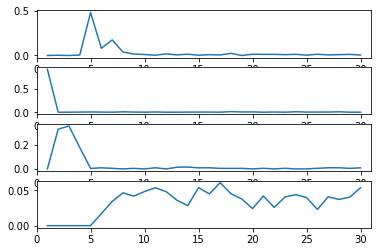

In [17]:
plt.figure()
for i in range(n_components):
  plt.subplot(n_components,1,i+1)
  plt.plot(np.arange(n)+1, W_norm[:,i])
  plt.xlim([0,W_norm.shape[0]+1])
  
# plt.show(block=False)

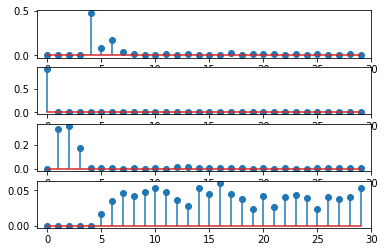

In [18]:
plt.figure()
for i in range(n_components):
  plt.subplot(n_components,1,i+1)
  plt.stem(W_norm[:,i], use_line_collection=True)
  plt.xlim([-1,W_norm.shape[0]])

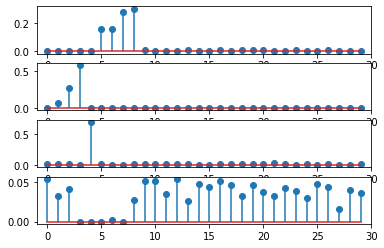

In [19]:
plt.figure()
for i in range(n_components):
  plt.subplot(n_components,1,i+1)
  plt.stem(H_norm[i,:], use_line_collection=True)
  plt.xlim([-1,H_norm.shape[1]])

In [20]:
# ----------
# BIC (Bayesian Information Criterion)

ks = np.array(range(1,10))  # #components
bic1 = np.zeros(len(ks))  # BIC 1st term: minus of log likelihood
bic2 = np.zeros(len(ks))  # BIC 2nd term: penalty or Occam's factor

for i in range(len(ks)):
  n_components = ks[i]
  m = NMF(n_components = n_components, beta_loss = 'kullback-leibler', solver = 'mu',
          init = 'random', random_state = 123,
          alpha = 0.0, l1_ratio = 1.0, verbose=True).fit(X)
  bic1[i] = 0.5 * (m.reconstruction_err_ ** 2)
  bic2[i] = 2 * n * n_components * np.log(n)

bic = bic1 + bic2

Epoch 10 reached after 0.004 seconds, error: 60.897854
Epoch 20 reached after 0.006 seconds, error: 60.897854
Epoch 10 reached after 0.001 seconds, error: 49.137649
Epoch 20 reached after 0.002 seconds, error: 48.982337
Epoch 30 reached after 0.005 seconds, error: 48.968789
Epoch 40 reached after 0.006 seconds, error: 48.966790
Epoch 10 reached after 0.002 seconds, error: 39.990146
Epoch 20 reached after 0.004 seconds, error: 39.924457
Epoch 30 reached after 0.006 seconds, error: 39.922539
Epoch 10 reached after 0.002 seconds, error: 39.202688
Epoch 20 reached after 0.003 seconds, error: 37.501766
Epoch 30 reached after 0.005 seconds, error: 35.759520
Epoch 40 reached after 0.006 seconds, error: 34.780061
Epoch 50 reached after 0.008 seconds, error: 33.872543
Epoch 60 reached after 0.010 seconds, error: 33.869467
Epoch 10 reached after 0.001 seconds, error: 29.012529
Epoch 20 reached after 0.003 seconds, error: 28.042018
Epoch 30 reached after 0.005 seconds, error: 28.015034
Epoch 40 r

C:\Anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:1076: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn("Maximum number of iterations %d reached. Increase it to"


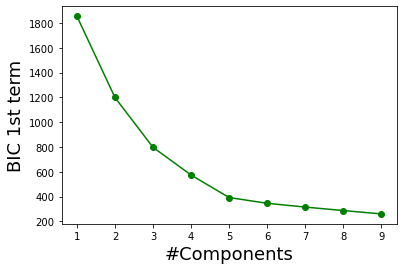

In [21]:
# plotting each BIC terms from the equation bic = bic1 + bic2

plt.figure()
plt.plot(ks, bic1, color="green", marker='o')
plt.xticks(ks)
plt.xlabel("#Components", fontsize=18)
plt.ylabel("BIC 1st term", fontsize=18)
plt.savefig('BIC1.eps', format='eps')
# plt.show()

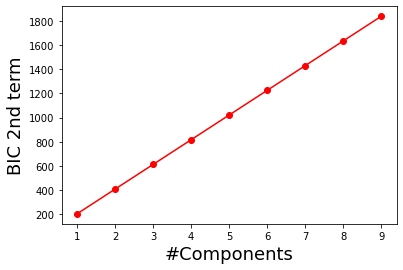

In [22]:
plt.figure()
plt.plot(ks, bic2, color="red", marker='o')
plt.xticks(ks)
plt.xlabel("#Components", fontsize=18)
plt.ylabel("BIC 2nd term", fontsize=18)
plt.savefig('BIC2.eps', format='eps')
# plt.show()

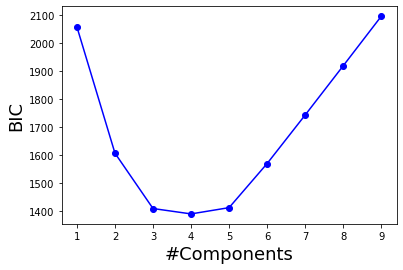

In [23]:
plt.figure()
plt.plot(ks, bic, color="blue", marker='o')
plt.xticks(ks)
plt.xlabel("#Components", fontsize=18)
plt.ylabel("BIC", fontsize=18)
plt.savefig('BIC.eps', format='eps')
# plt.show()